## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Mar 26 09:11:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

HOME = os.getcwd()
print(HOME)


Mounted at /content/drive
/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a [supported format](https://roboflow.com/formats), the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v8` dataset format. (Formerly, we used to use `Yolov5`, as the gif shows)

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




🟢 Tip: The examples below work even if you use our non-custom model. However, you won't be able to deploy it to Roboflow. To do that, create a custom dataset as described below or fork (copy) one into your workspace from Universe.

In [6]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NNY7waK46au38z61jo8B")
project = rf.workspace("plantpal").project("annotation-dataset-q9ojd")
version = project.version(3)
dataset = version.download("yolov8")


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Annotation-Dataset-3 in yolov8:: 100%|██████████| 5270/5270 [00:00<00:00, 5781.20it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=15 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 360MB/s]
New https://pypi.org/project/ultralytics/8.3.96 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Annotation-Dataset-3/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=

In [10]:
! pwd

/content


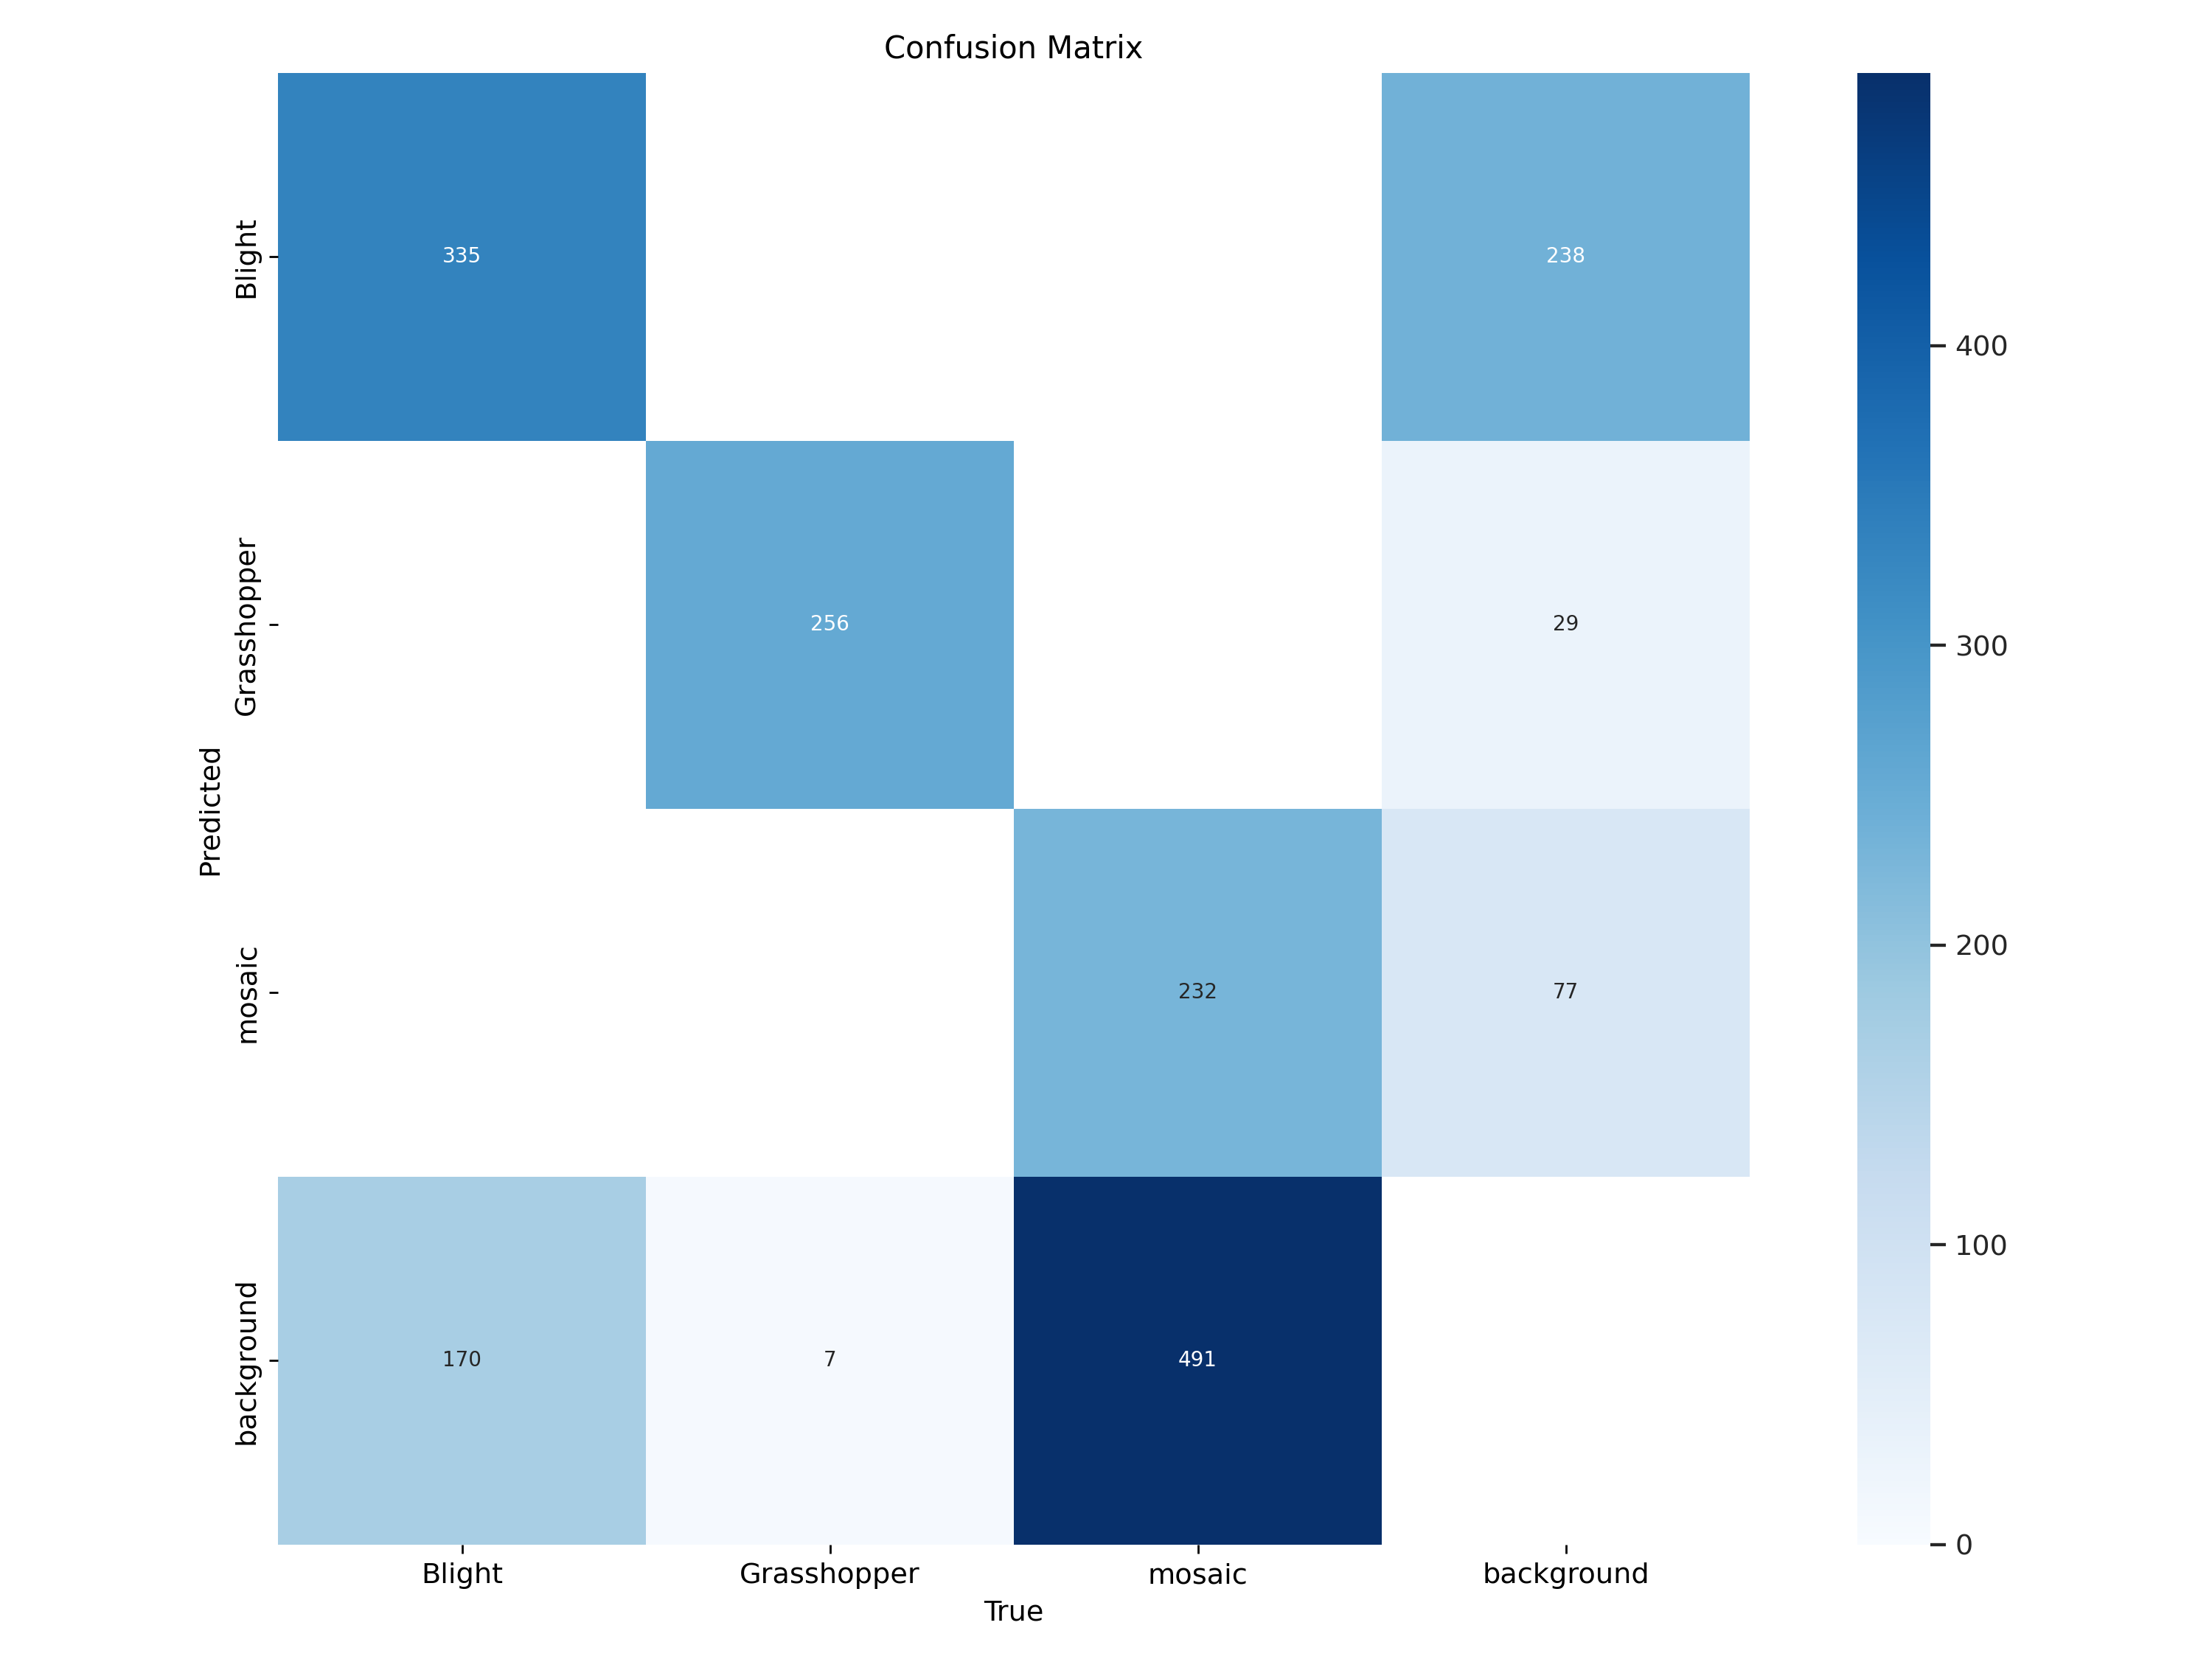

In [11]:
from IPython.display import Image

Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

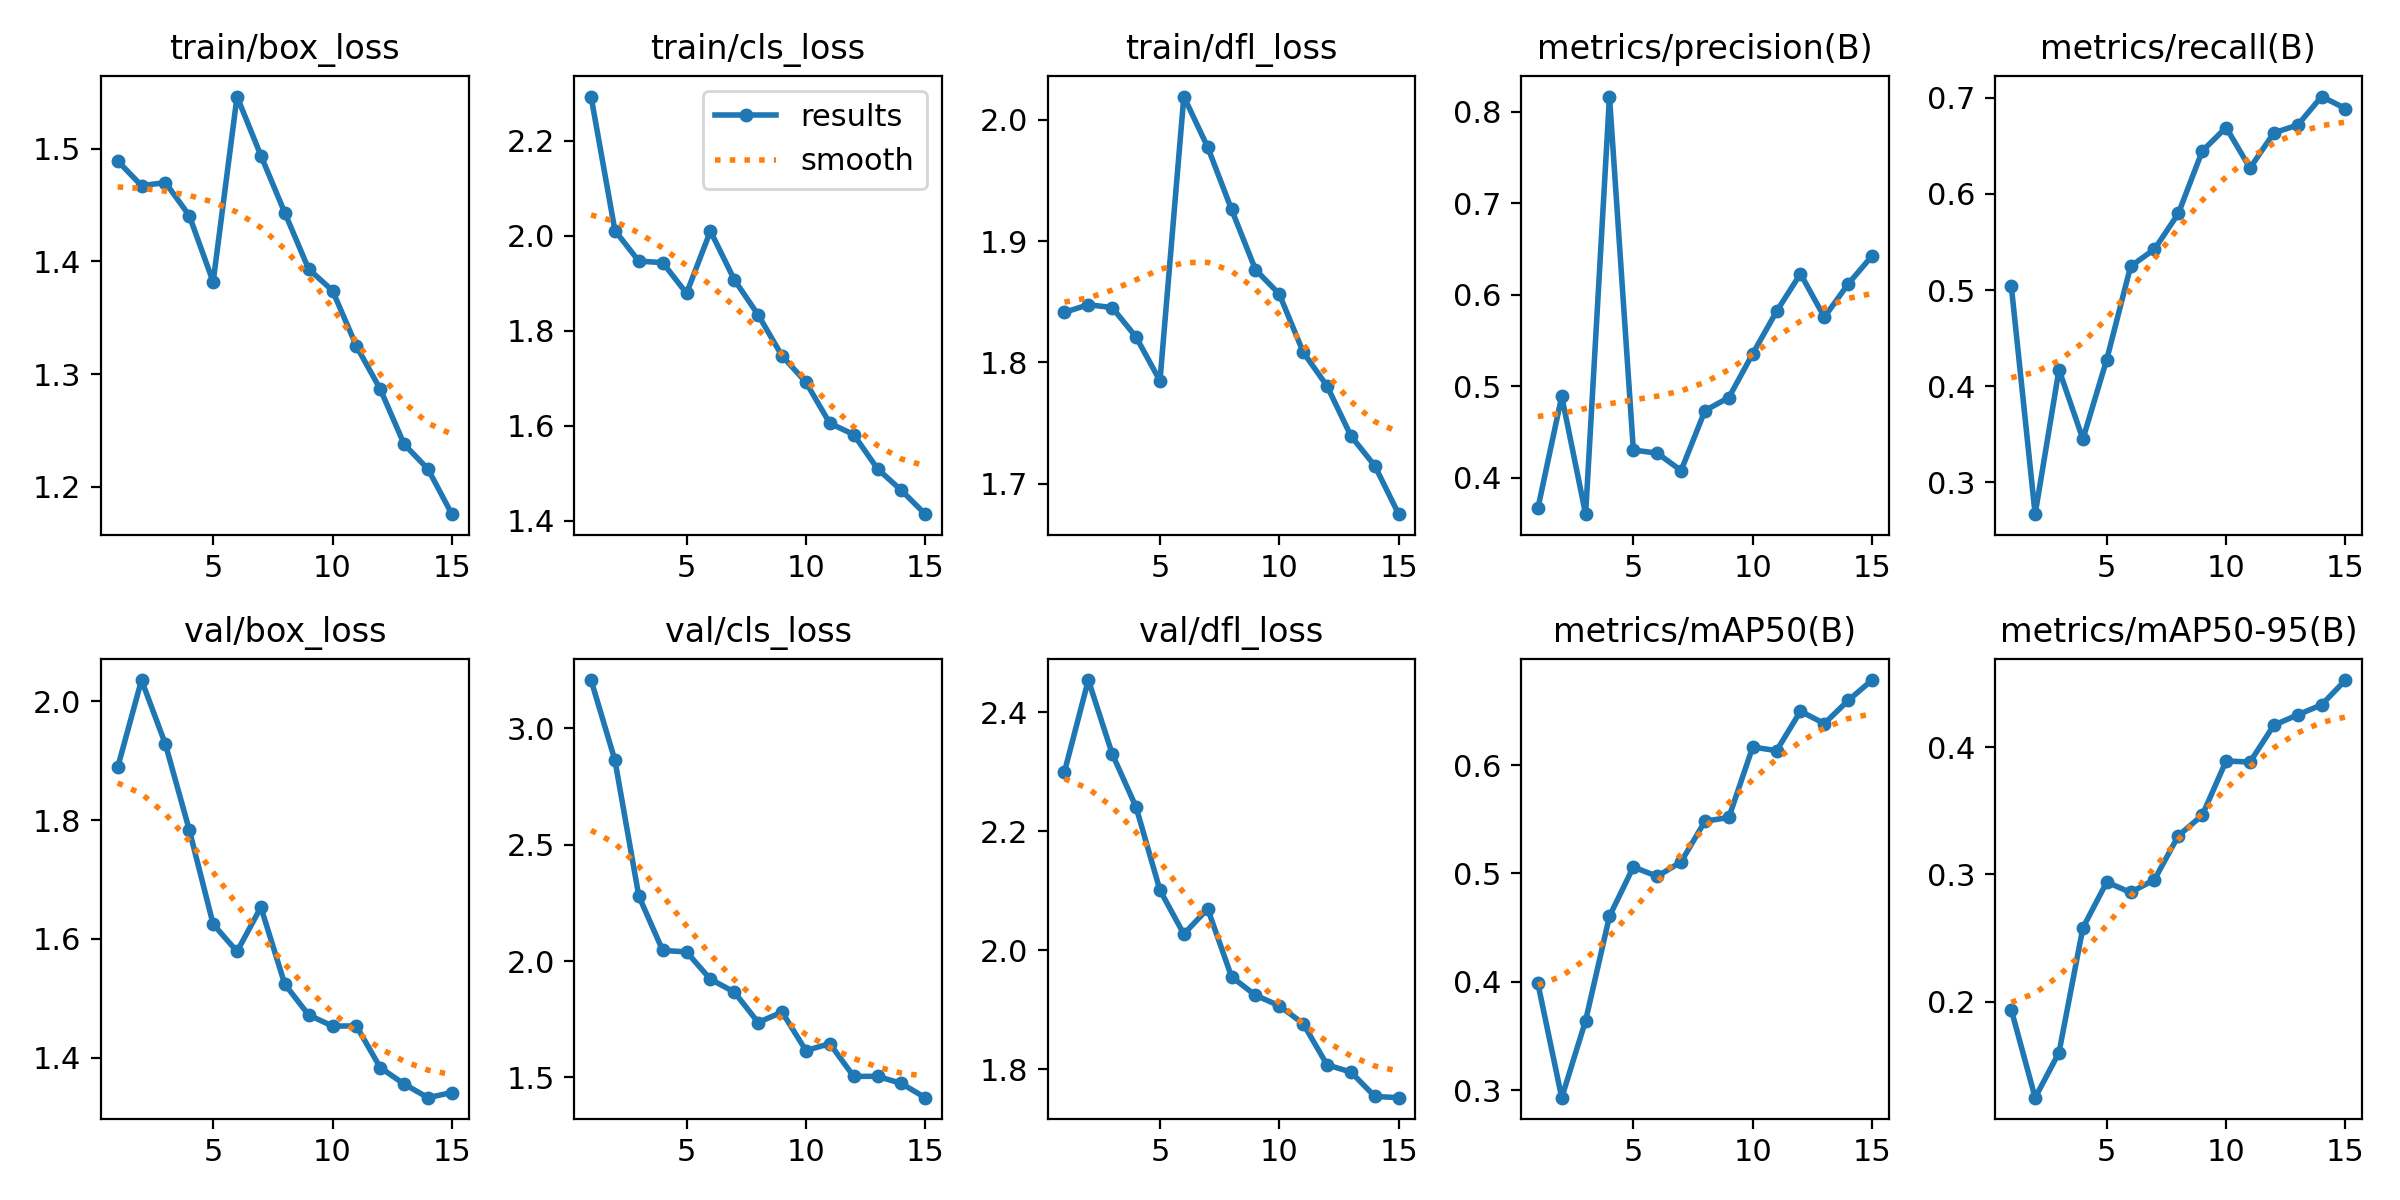

In [12]:
Image(filename=f'runs/detect/train/results.png', width=600)

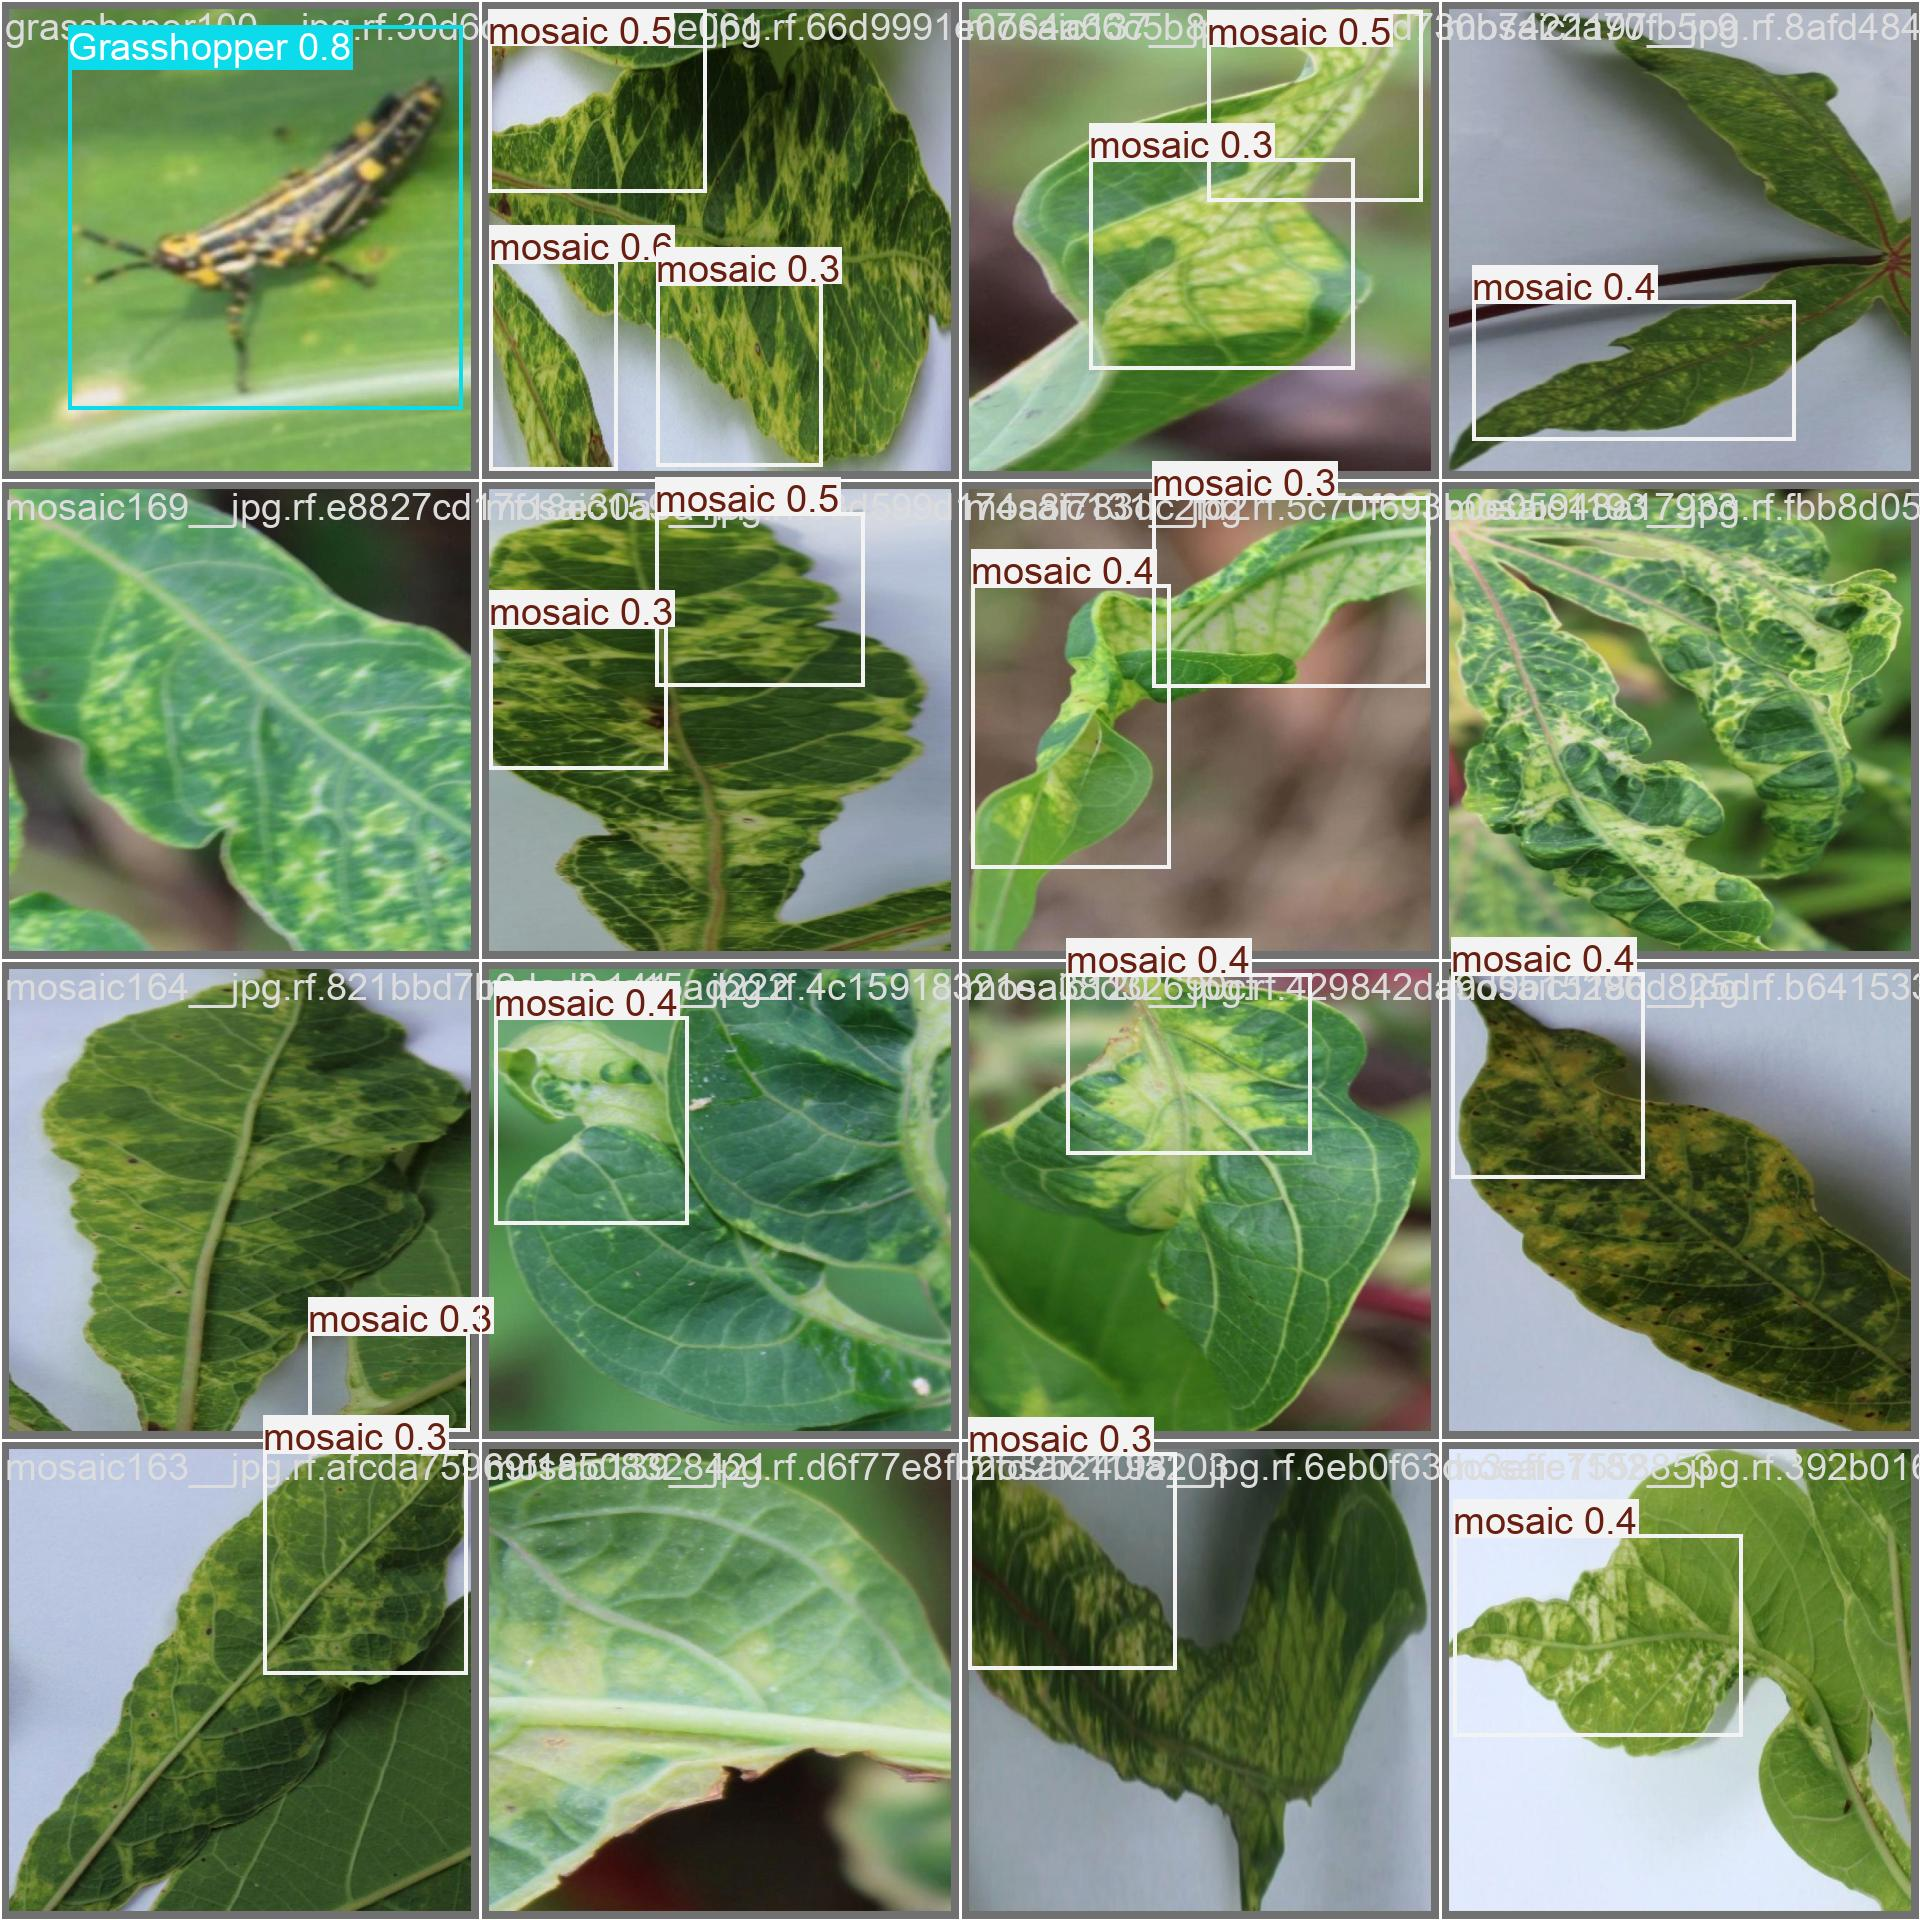

In [13]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [14]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Annotation-Dataset-3/valid/labels.cache... 527 images, 0 backgrounds, 0 corrupt: 100% 527/527 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 33/33 [00:12<00:00,  2.66it/s]
                   all        527       1491      0.642      0.689      0.678      0.452
                Blight        197        505      0.492      0.701      0.612       0.42
           Grasshopper        107        263      0.881       0.97       0.96      0.758
                mosaic        223        723      0.554      0.396      0.461      0.179
Speed: 1.6ms preprocess, 13.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [15]:
# Save trained model to Google Drive
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/yolov8_best.pt

## Inference with Custom Model

In [16]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/262 /content/datasets/Annotation-Dataset-3/test/images/grasshoper101__jpg.rf.48399c92652a82ada6c09fb79dfb9dd7.jpg: 800x800 1 Grasshopper, 23.0ms
image 2/262 /content/datasets/Annotation-Dataset-3/test/images/grasshoper103__jpg.rf.de6a442e7e3d50e724188d1851dffea9.jpg: 800x800 2 Grasshoppers, 23.0ms
image 3/262 /content/datasets/Annotation-Dataset-3/test/images/grasshoper123__jpg.rf.c38590b07bc619d722d3a42fd158ae27.jpg: 800x800 2 Grasshoppers, 22.9ms
image 4/262 /content/datasets/Annotation-Dataset-3/test/images/grasshoper130__jpg.rf.696322afc8edbc365673f5619d032264.jpg: 800x800 2 Grasshoppers, 22.9ms
image 5/262 /content/datasets/Annotation-Dataset-3/test/images/grasshoper153__jpg.rf.2a639e06312cf7a633cbce49057ef1b0.jpg: 800x800 4 Grasshoppers, 22.9ms
image 6/262 /content/datasets/Annotation-Dataset-3/test/ima

**NOTE:** Let's take a look at few results.

In [17]:
! pwd

/content


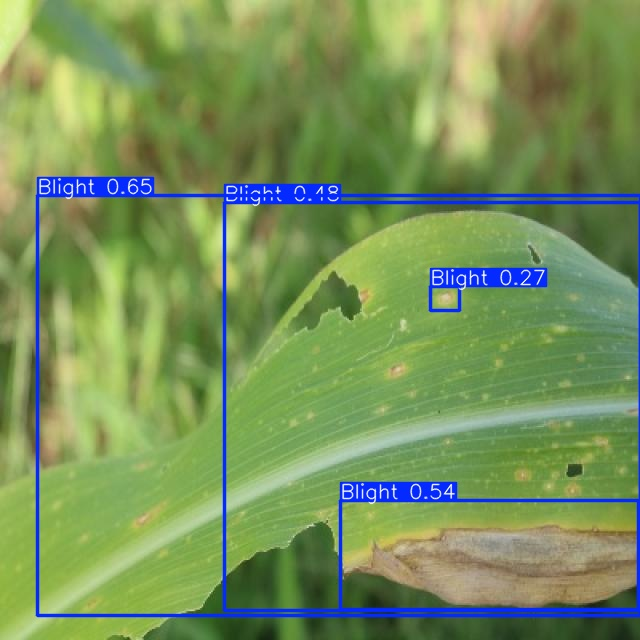

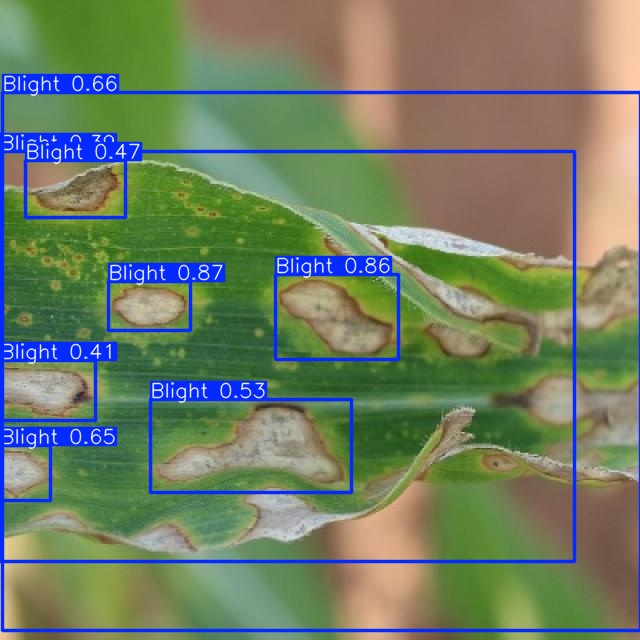

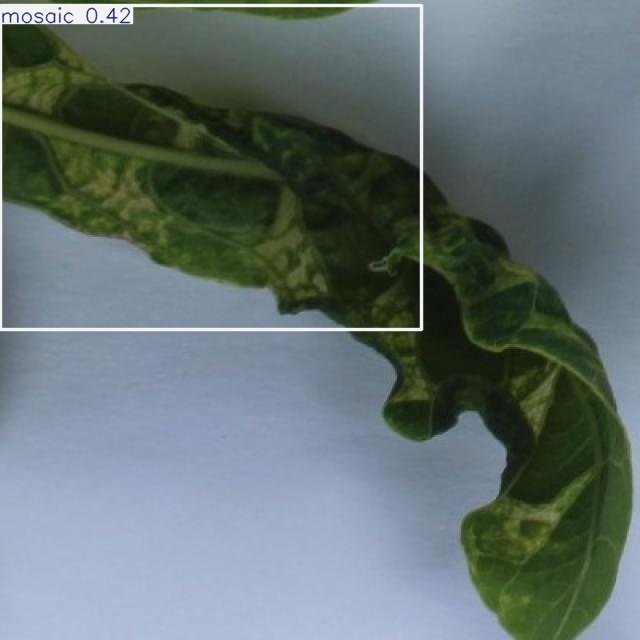

In [18]:
import os
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = 'runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [22]:
!pip install ultralytics flask flask-cors pyngrok opencv-python-headless

In [23]:
! pip install pyngrok

In [24]:
!ngrok authtoken 2uqhvQ7S1WQX1KBQYcIAICogL2A_5fG9QdcMLKmdEYWMbroof


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [25]:
from pyngrok import ngrok
ngrok.kill()
public_url = ngrok.connect(5000).public_url
print(f'Public URL: {public_url}')


Public URL: https://b1d9-35-186-158-81.ngrok-free.app


In [27]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import base64
import cv2
import numpy as np
from ultralytics import YOLO

app = Flask(__name__)
CORS(app)

# Load the YOLO model
model = YOLO('runs/detect/train/weights/best.pt')  # Upload your model to Colab

@app.route('/predict', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return jsonify({'error': 'No image provided'}), 400

    file = request.files['image']

    # Read and process the image
    image_bytes = file.read()
    nparr = np.frombuffer(image_bytes, np.uint8)
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    # Perform prediction
    results = model(image)

    # Process results
    predictions = []
    for result in results:
        boxes = result.boxes
        for box in boxes:
            pred = {
                'class': result.names[int(box.cls[0])],
                'confidence': float(box.conf[0]),
                'bbox': box.xyxy[0].tolist()
            }
            predictions.append(pred)

    # Convert the annotated image to base64
    _, buffer = cv2.imencode('.jpg', results[0].plot())
    image_base64 = base64.b64encode(buffer).decode('utf-8')

    return jsonify({
        'predictions': predictions,
        'image': image_base64
    })

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit



0: 800x800 1 Grasshopper, 23.9ms
Speed: 8.7ms preprocess, 23.9ms inference, 181.7ms postprocess per image at shape (1, 3, 800, 800)


INFO:werkzeug:127.0.0.1 - - [26/Mar/2025 09:52:53] "POST /predict HTTP/1.1" 200 -
